In [13]:
import numpy as np
from matplotlib import pyplot as plt

# file_a = open('in/a_example.in', 'r')
file_b = open('in/b_small.in', 'r')
file_c = open('in/c_medium.in', 'r')
file_d = open('in/d_big.in', 'r')
file_e = open('in/e_quite_big.in', 'r')

contexts = [ #file_a.readlines(), 
           file_b.readlines(), 
           file_c.readlines(), 
           file_d.readlines(), 
           file_e.readlines()]

Data sets	|	Mean		|	Variance	|	Min	|	Max
----------------------------------------------------------------------------------------------
Data set  b 	| 10.11111111111111	|180.09876543209873	|0		|46
Data set  c 	| 3.836734693877551	|16.299875052061644	|0		|15
Data set  d 	| 499.9454727363682	|227634.38772212516	|1		|4384
Data set  e 	| 14.979197919791979	|222.49101641837356	|0		|157


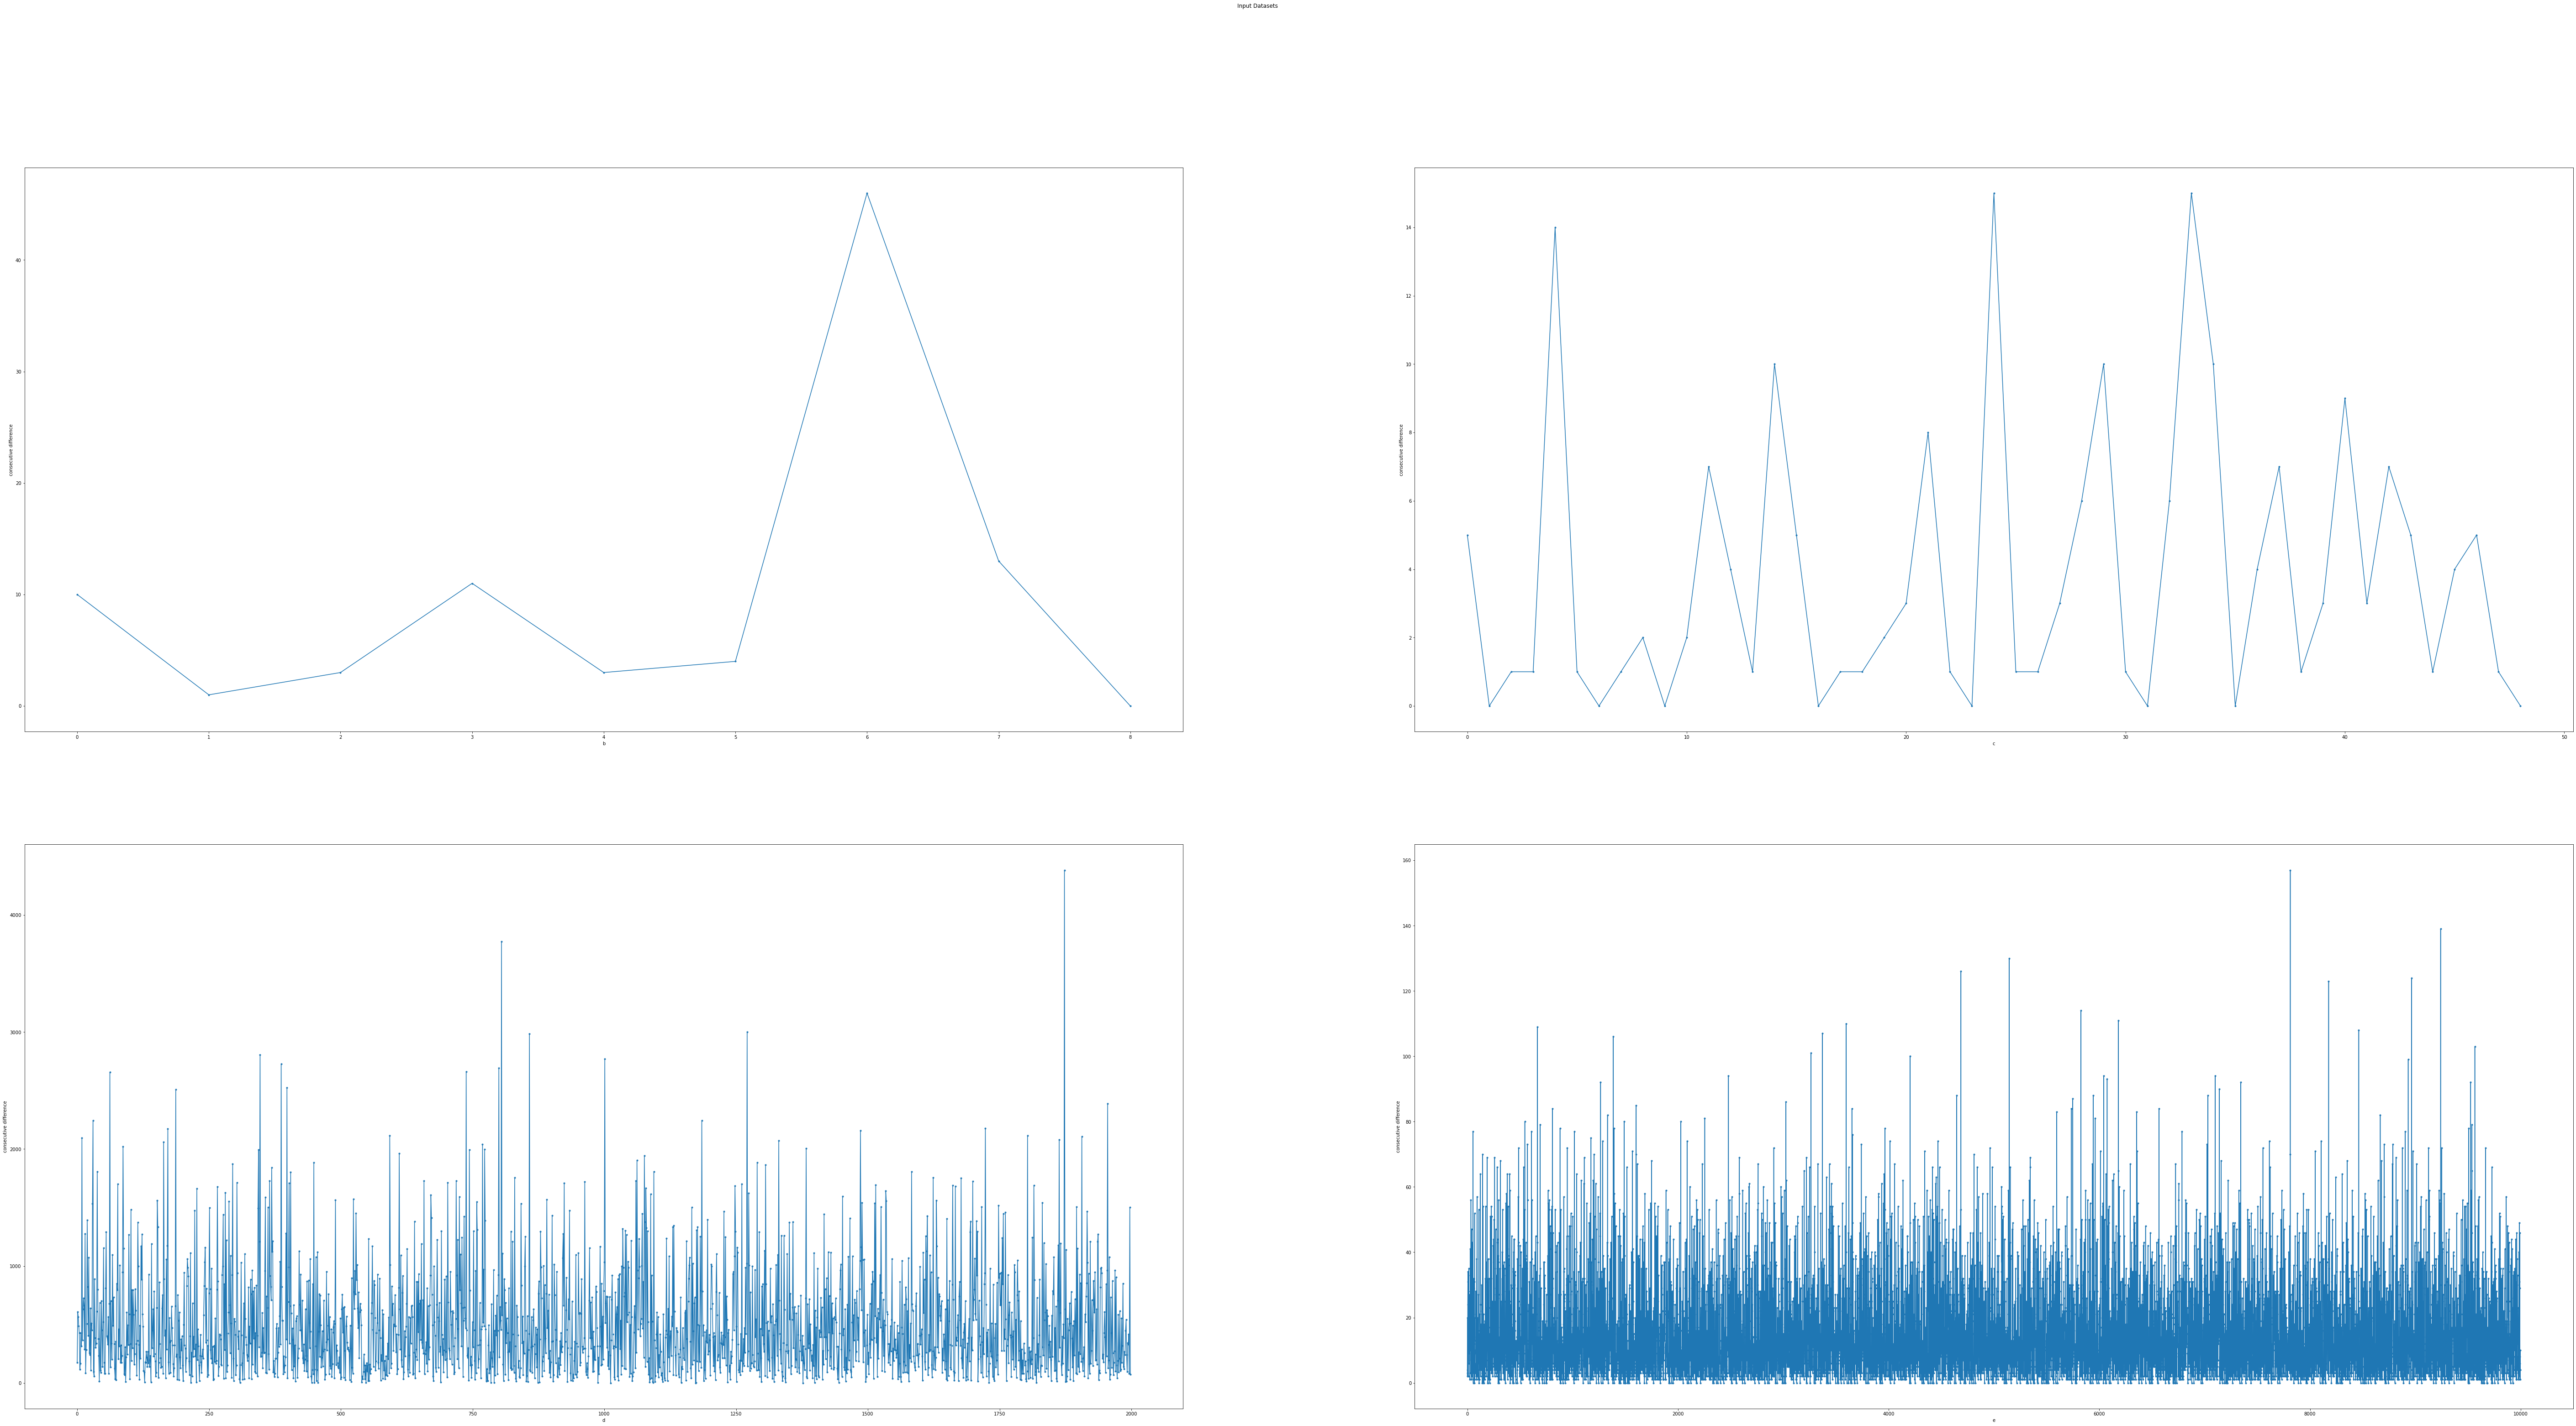

In [91]:
pizzas = []

for i, context in enumerate(contexts):
    string = []
    string = context[1].split(' ')
    nums = [int(j) for j in string]
    pizzas.append(nums)

diff = []
for pizza in pizzas:
    tmp_diff = []
    for i in range(len(pizza)-1):
        tmp_diff.append(pizza[i+1] - pizza[i])
    diff.append(tmp_diff)

titles = ['b', 'c', 'd', 'e']

print('Data sets\t|\tMean\t\t|\tVariance\t|\tMin\t|\tMax', 
      end='\n----------------------------------------------------------------------------------------------\n')

fig, axs = plt.subplots(2, 2, figsize=(100,50))
fig.suptitle('Input Datasets')
for i in range(4):
    print('Data set ', titles[i], '\t|', sum(diff[i])/len(diff[i]), end='\t|')
    print(np.var(diff[i]), end='\t|')
    print(min(diff[i]), end='\t\t|')
    print(max(diff[i]))
    axs[i//2][i%2].set_xlabel(titles[i])
    axs[i//2][i%2].set_ylabel('consecutive difference')
    axs[i//2][i%2].plot(range(len(diff[i])), diff[i], '.-');

In all four data sets except *c* consecutive differences are reasonably low and they are related to actual lost points in the results of [my algorithm](https://github.com/AliKhudiyev/google-hashcode2020_warmup). The data set *c*, however, is the only one which has much higher mean value(almost 500) in terms of consecutive differences between the number of pizza slices. Although higher mean value necessarily leads the algorithm to fail but it still comes a bit interesting how the algorithm handled it. That's why I am going to explore this data set a bit further.

In [63]:
def my_var(diff):
    var = 0
    unsigned_var = 0
    mean = sum(diff)/len(diff)
    
    for d in diff:
        var += (d-mean)/len(diff)
        unsigned_var += np.abs(d-mean)/len(diff)
    
    return var, unsigned_var

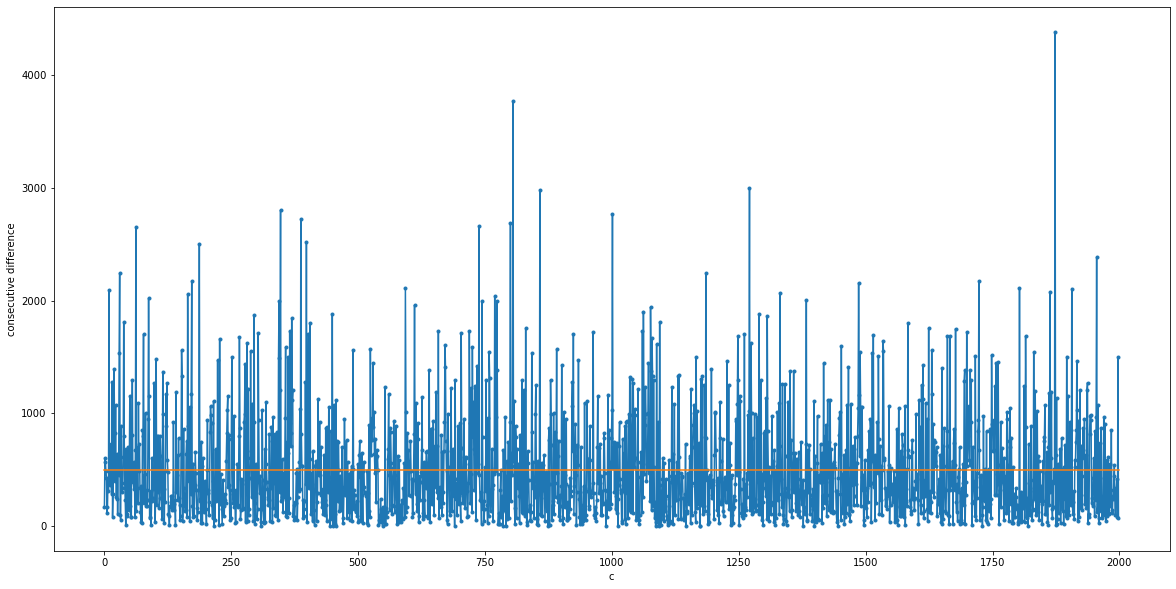

In [114]:
fig1, ax = plt.subplots(1, 1, figsize=(20,10))
ax.set_xlabel('c')
ax.set_ylabel('consecutive difference')
ax.plot(range(len(diff[2])), diff[2], '.-');
ax.plot([0, len(diff[2])], [sum(diff[2])/len(diff[2])]*2, '-');

In [116]:
var_uvar = []
for i in range(4):
    var_uvar.append(my_var(diff[i]))
print('Average (unsigned) distance from mean value')
for i in range(4):
    print('Data set ', titles[i], ':', var_uvar[i][1])

# print('\nAverage signed distance from mean value')
# for i in range(4):
#     print('Data set ', titles[i], ':', var_uvar[i][0])

diff_occ = {}
for i in range(2,3):
    for d in diff[i]:
        if d not in diff_occ.keys():
            diff_occ[d] = 1
        else:
            diff_occ[d] += 1

print('\nPrinting most occured 20 consecutive differences:')
sorted_diff_occ = {k: v for k, v in sorted(diff_occ.items(), key=lambda item: item[1])}
for i in range(20):
    dif = list(sorted_diff_occ.keys())[-1-i]
    times = list(sorted_diff_occ.values())[-1-i]
    print(dif, 'occurs', times, ' times')

Average (unsigned) distance from mean value
Data set  b : 8.814814814814815
Data set  c : 3.2353186172428154
Data set  d : 355.06180804259026
Data set  e : 11.011114852859656

Printing most occured 20 consecutive differences:
103 occurs 8  times
317 occurs 8  times
3 occurs 8  times
89 occurs 8  times
215 occurs 7  times
262 occurs 7  times
53 occurs 7  times
59 occurs 7  times
98 occurs 7  times
454 occurs 7  times
17 occurs 6  times
199 occurs 6  times
96 occurs 6  times
139 occurs 6  times
72 occurs 6  times
60 occurs 6  times
106 occurs 6  times
277 occurs 6  times
55 occurs 6  times
34 occurs 6  times


By printing most occured 20 consecutive differences it is a bit more obvious that although mean difference is high(almost 500) there are still smaller numbers such as 3, 17, 34, 53 occuring 8, 6, 6, 7 times respectively which may increase a chance of getting higher results.